In [1]:
#Prepare the environment
import pandas as pd #visualization the destribution plot,
import seaborn as sns #visualization the residual plot,
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
from matplotlib import rcParams
url="https://raw.githubusercontent.com/indoagrotama/pythonportofolio/main/imports-85.data"
df = pd.read_csv(url, header=None)

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [4]:
headers=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression-ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
df.columns=headers

In [5]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression-ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
#dataformat to float
df["price"]=pd.to_numeric(df['price'], errors='coerce')
df["peak_rpm"]=pd.to_numeric(df['peak_rpm'], errors='coerce')
df["horsepower"]=pd.to_numeric(df['horsepower'], errors='coerce')
df["normalized_losses"]=pd.to_numeric(df['normalized_losses'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

<AxesSubplot:>

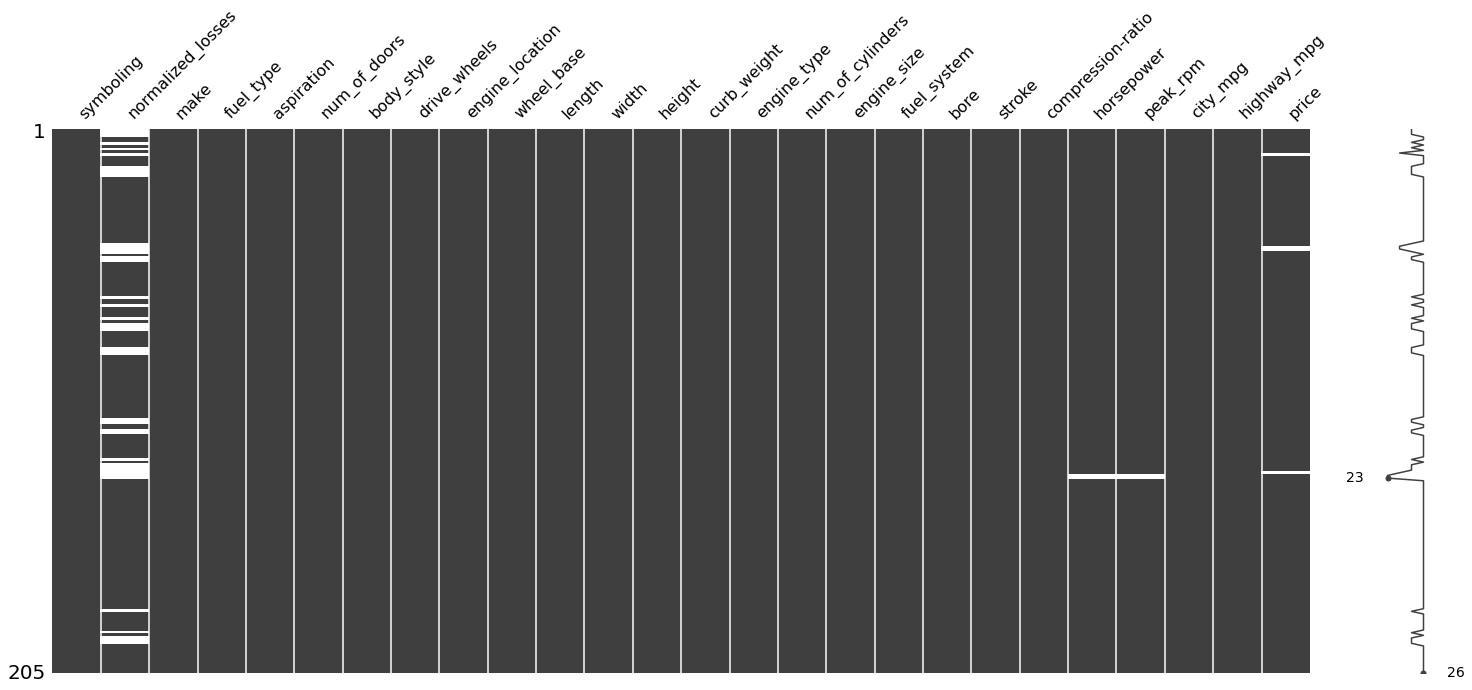

In [7]:
#first checking for the missing value
import missingno as msno
msno.matrix(df)

In [8]:
#check the number of value missing
df.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          0
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [9]:
#imputting missing value with the mean of its column
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['price_mean']] = imp.fit_transform(df[['price']])
df["price_mean"].isnull().sum()

0

In [10]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['peak_rpm_mean']] = imp.fit_transform(df[['peak_rpm']])
df["peak_rpm_mean"].isnull().sum()

0

In [11]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['horsepower_mean']] = imp.fit_transform(df[['horsepower']])
df["horsepower_mean"].isnull().sum()

0

In [12]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['normalized_losses_mean']] = imp.fit_transform(df[['normalized_losses']])
df["normalized_losses_mean"].isnull().sum()

0

In [13]:
#removing the column with na value
df.drop(['price','peak_rpm','horsepower','normalized_losses'], axis=1, inplace=True)

<AxesSubplot:>

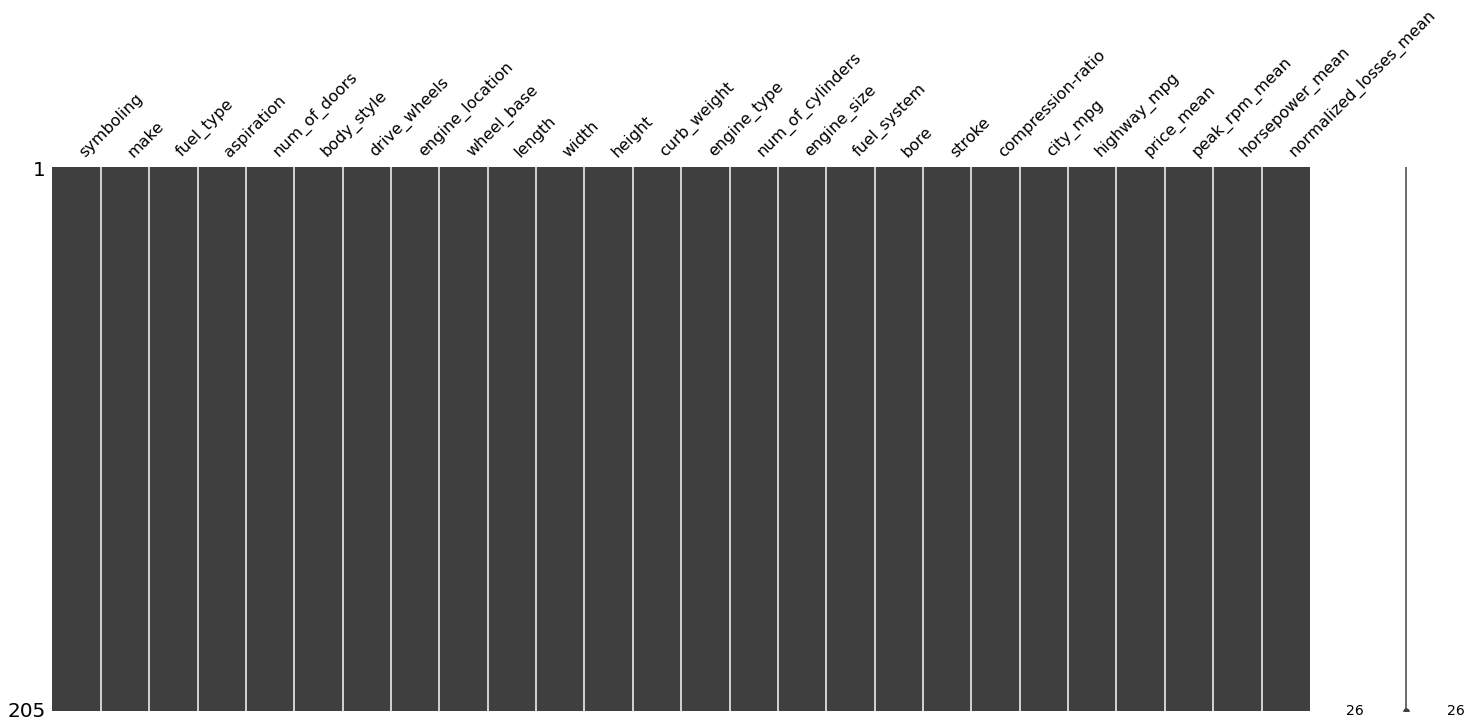

In [14]:
#checking again for the missing value
msno.matrix(df)

In [15]:
df.isnull().sum()

symboling                 0
make                      0
fuel_type                 0
aspiration                0
num_of_doors              0
body_style                0
drive_wheels              0
engine_location           0
wheel_base                0
length                    0
width                     0
height                    0
curb_weight               0
engine_type               0
num_of_cylinders          0
engine_size               0
fuel_system               0
bore                      0
stroke                    0
compression-ratio         0
city_mpg                  0
highway_mpg               0
price_mean                0
peak_rpm_mean             0
horsepower_mean           0
normalized_losses_mean    0
dtype: int64

In [16]:
#save to csv
path="C:/Users/Eunice Gabriella/Documents/automobiles.csv"
df.to_csv(path)

In [17]:
#statistic descritive
df

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression-ratio,city_mpg,highway_mpg,price_mean,peak_rpm_mean,horsepower_mean,normalized_losses_mean
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,21,27,13495.0,5000.0,111.0,122.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,21,27,16500.0,5000.0,111.0,122.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,19,26,16500.0,5000.0,154.0,122.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,24,30,13950.0,5500.0,102.0,164.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,18,22,17450.0,5500.0,115.0,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,23,28,16845.0,5400.0,114.0,95.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,19,25,19045.0,5300.0,160.0,95.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,18,23,21485.0,5500.0,134.0,95.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,26,27,22470.0,4800.0,106.0,95.0


In [18]:
#statistic descriptive for all
df.describe(include='all')

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression-ratio,city_mpg,highway_mpg,price_mean,peak_rpm_mean,horsepower_mean,normalized_losses_mean
count,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,...,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,22,2,2,3,5,3,2,NaN,NaN,...,8,39,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,...,mpfi,3.62,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,185,168,114,96,120,202,NaN,NaN,...,94,23,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,...,NaN,NaN,NaN,10.142537,25.219512,30.751220,13207.129353,5125.369458,104.256158,122.000000
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,...,NaN,NaN,NaN,3.972040,6.542142,6.886443,7868.768212,476.979093,39.519211,31.681008
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,...,NaN,NaN,NaN,7.000000,13.000000,16.000000,5118.000000,4150.000000,48.000000,65.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,...,NaN,NaN,NaN,8.600000,19.000000,25.000000,7788.000000,4800.000000,70.000000,101.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,...,NaN,NaN,NaN,9.000000,24.000000,30.000000,10595.000000,5200.000000,95.000000,122.000000
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,...,NaN,NaN,NaN,9.400000,30.000000,34.000000,16500.000000,5500.000000,116.000000,137.000000


In [19]:
#groupby methode
df_test=df[['drive_wheels','body_style','price_mean']]
df_grp=df_test.groupby(['drive_wheels','body_style'], as_index= False).mean()
df_grp

,drive_wheels,body_style,price_mean
0,4wd,hatchback,10405.064677
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.934363
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


(0.0, 52478.0980233864)

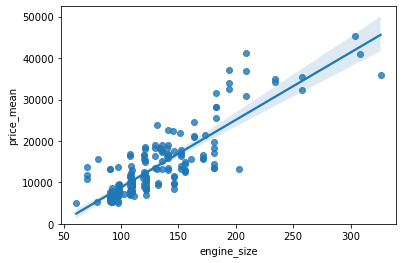

In [20]:
#correlation
sns.regplot(x="engine_size", y="price_mean", data=df)
plt.ylim(0,)

(0.0, 48130.91055062844)

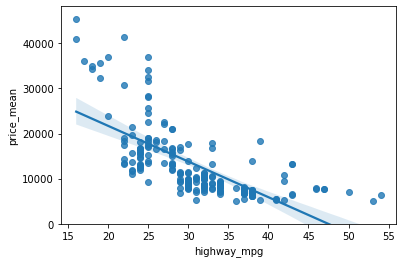

In [21]:
sns.regplot(x="highway_mpg", y="price_mean", data=df)
plt.ylim(0,)

(0.0, 47414.1)

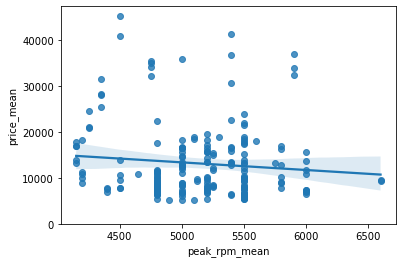

In [22]:
sns.regplot(x="peak_rpm_mean", y="price_mean", data=df)
plt.ylim(0,)

In [23]:
#correlation-statistic
#pearson correlation. Close to +1 = large possitive relationship, close to -1 = large negative relationship, close to 0 = no relationship
#P-value. <0.001 = strong certainty in result, <0.05 = moderate, <0.1 = weak, >0.1 = no
pearson_coef, p_value = stats.pearsonr(df["horsepower_mean"], df["price_mean"])
print(pearson_coef, p_value)

0.7579169537498176 1.6076703978131245e-39


The pearson coefficient = 0,75... is close to 1, so it has large possiitve relation. P value is 1.6e-29 is <0.001, so it has strong certainty in result.

In [24]:
# chi square test for association
#first make ke crosstab with pandas
count_table = pd.crosstab(df.fuel_type, df.aspiration, margins=True, margins_name="Total")
count_table

aspiration,std,turbo,Total
fuel_type,,,
diesel,7,13,20
gas,161,24,185
Total,168,37,205


In [25]:
#using scipy to check the chi square
scipy.stats.chi2_contingency(count_table, correction = True )

(33.02954559289019,
 1.1779580179043583e-06,
 4,
 array([[ 16.3902439,   3.6097561,  20.       ],
        [151.6097561,  33.3902439, 185.       ],
        [168.       ,  37.       , 205.       ]]))

Since the p-value is close to zero, we reject the null hypothesis that the two variables are independent and conclude that there is evidence of association between fuel-type and aspiration.

In [26]:
#Linear Regression --> 1 independent variable to make prediction 

#Simple Linear Model
#X : predictor variable
#Y : target variable

#Import linear_model from scikit-learn
from sklearn.linear_model import LinearRegression

#Create a Linear Regression Object using the constructor
lm_SLR=LinearRegression()

#we define the predictor variable and target variable
X = df[['highway_mpg']]
Y = df[['price_mean']]

#then use lm.fit(X,Y) to fit the model,ie. find the parameter b0 and b1
lm_SLR.fit(X,Y)

#we can obtain a prediction
Yhat_SLR = lm_SLR.predict(X)

#check the result
data_set_SLR = pd.DataFrame(data=Yhat_SLR)
data_set_SLR['X']=df['highway_mpg']
headers=['Yhat_SLR', 'X']
data_set_SLR.columns=headers
data_set_SLR

,Yhat_SLR,X
0,16166.941405,27
1,16166.941405,27
2,16955.968025,26
3,13799.861546,30
4,20112.074505,22
...,...,...
200,15377.914785,28
201,17744.994645,25
202,19323.047885,23
203,16166.941405,27


In [27]:
#SLR - Estimated Linear Model
#we can view the interception (b0)
lm_SLR.intercept_

array([37470.66014138])

In [28]:
#we can also view the slope (b1)
lm_SLR.coef_

array([[-789.02661986]])

The relationship between Price and Highway MPG is  given by:

**Price = 37470.66 - 789.03 * highway_mpg**

In [30]:
#Multi Linear Regression --> multiple independent variable to make prediction
#X1, X2, X3, ... = predictor variables
#Y = target variable

#Fitting a Multiple Linear Regression Model Estimator

# We can extract the 4 predictor variable and store them in the variable Z
Z = df[['horsepower_mean', 'curb_weight', 'engine_size', 'highway_mpg']]

# Train the model as before :
lm=LinearRegression()
lm.fit(Z, df['price_mean'])

# We can also obtain the prediction 
Yhat = lm.predict(Z)
data_set=pd.DataFrame(data=Yhat)
headers=['Yhat']
data_set.columns=headers
data_set['horsepower']=df['horsepower_mean']
data_set['curb_weight']=df['curb_weight']
data_set['engine_size']=df['engine_size']
data_set['highway_mpg']=df['highway_mpg']
data_set

,Yhat,horsepower,curb_weight,engine_size,highway_mpg
0,13857.520670,111.0,2548,130,27
1,13857.520670,111.0,2548,130,27
2,17973.171912,154.0,2823,152,26
3,10572.493500,102.0,2337,109,30
4,15912.729277,115.0,2824,136,22
...,...,...,...,...,...
200,16496.718530,114.0,2952,141,28
201,17894.828111,160.0,3049,141,25
202,20648.936205,134.0,3012,173,23
203,17829.919192,106.0,3217,145,27


In [31]:
#MLR - Estimated Multiple Linear Model
#we can view the interception (b0)
lm.intercept_

-9239.379970934511

In [32]:
#we can also view the slope (b1, b2, b3, b4)
lm.coef_

array([ 18.12178086,   3.80596513, 101.121117  , -65.10968116])

The relationship between Price and Horsepower, Curb Weight, Engine Size, Highway MPG

**Price = -9239.37 + (18.12 * highway_mpg) + (3.80 * curb_weight) + (101.12 * engine_size) - (65.10 * highway_mpg)**

(0.0, 48134.29604275593)

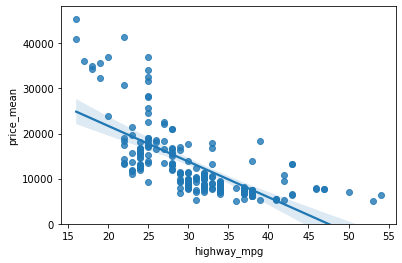

In [33]:
#Regression Plot
#1. The relationship between 2 variables
#2. Strength of the correlation 
#3. The direction of the correlation (possitive or negative)

sns.regplot(x="highway_mpg", y="price_mean", data=df)
plt.ylim(0,)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highway_mpg', ylabel='price_mean'>

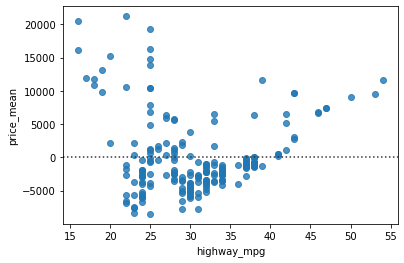

In [34]:
#checking residual plot
#resedual plot represent the error between the actual value
sns.residplot(df['highway_mpg'], df['price_mean'])

Look at the spread of the residual:
Randomly spread around the x-axis then a linear regression is appropriate.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

<AxesSubplot:xlabel='price_mean', ylabel='Density'>

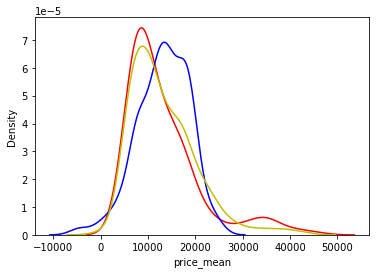

In [35]:
ax1 = sns.distplot(df['price_mean'], hist=False, color='r', label="Actual Value")
sns.distplot(Yhat_SLR, hist=False, color="b", label="Fitted Value", ax=ax1)
sns.distplot(Yhat, hist=False, color="y", label="Fitted Value", ax=ax1)

red = actual value of price; blue = fitted value of price in SLR; yellow = fitted value price in MLR

The comparation between the price and the Simple Linear Regression (SLR) show that the model not fitted well with the actual price. This is the model of Multi Linear Regression show us that the model more fitted than the SLR model.

### MSE and R^2

In [36]:
#Measure for in-sample evaluation -> a way to numerically determine how good the model fits on dataset
#Two way : Mean Square Error (MSE) and R Square (R^2)

#MSE 
from sklearn.metrics import mean_squared_error
mean_squared_error(df["price_mean"],Yhat)

13788871.220920242

In [37]:
#R^2 -> coeficient of determination 
# to measure how close the data is to the fitted regression line

lm.score(Z,df['price_mean'])

0.776210913272399

### Model Evaluation

In [38]:
#Training/Testing Set to train the model
from sklearn.model_selection import train_test_split
tr_data=df
y_data=tr_data['price_mean']
x_data=tr_data.drop('price_mean', axis=1)
x_train,x_test,y_test,y_train=train_test_split(x_data,y_data,test_size=0.3,random_state=0)

#### Cross Validation

In [39]:
#more effective use of data (each observation is used for both training and testing)
#function cross_val_score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lm_SLR,x_data[['highway_mpg']],y_data,cv=3)

In [40]:
np.mean(scores)

0.3079270370864973

In [41]:
#output is predict
from sklearn.model_selection import cross_val_predict
Y_pr=cross_val_predict(lm_SLR,x_data[['highway_mpg']],y_data,cv=3)

In [42]:
Y_pr

array([15773.64958162, 15773.64958162, 16588.22175157, 13329.93307176,
       19846.51043138, 17402.79392152, 17402.79392152, 17402.79392152,
       21475.65477128, 19846.51043138, 14144.50524171, 14144.50524171,
       14959.07741167, 14959.07741167, 17402.79392152, 19846.51043138,
       19846.51043138, 21475.65477128, -5405.22683713,  2740.49486239,
        2740.49486239,  4369.63920229,  6813.35571215, 13329.93307176,
        6813.35571215,  6813.35571215,  6813.35571215, 13329.93307176,
       13329.93307176, 18217.36609147, -6219.79900708,  6813.35571215,
        3555.06703234, 10071.64439195, 10071.64439195, 10071.64439195,
       10071.64439195, 10886.21656191, 10886.21656191, 10886.21656191,
       10886.21656191, 14959.07741167, 12515.36090181, 14144.50524171,
        2740.49486239,  2740.49486239, 14144.50524171, 22290.22694123,
       22290.22694123, 23919.37128114, 12515.36090181,  6813.35571215,
        6813.35571215,  6813.35571215,  6813.35571215, 19031.93826143,
      

### Overfitting, Underfitting and Model Selection


In [43]:
from sklearn.preprocessing import PolynomialFeatures
Rsqu_test=[]
order=[1,2,3,4]
for n in order:
    pr=PolynomialFeatures(degree=n)
    x_train_pr=pr.fit_transform(x_train[['horsepower_mean']])
    x_test_pr=pr.fit_transform(x_test[['horsepower_mean']])
    lm_SLR.fit(x_train_pr,y_train)
    Rsqu_test.append(lm_SLR.score(x_test_pr,y_test))

ValueError: Found input variables with inconsistent numbers of samples: [143, 62]

### Ridge Regression